# Introdução

# Análise de Vendas de Jogos 
**Explorando Tendências, Plataformas e Comportamento do Mercado Gamer**  

---

## 📌 Contexto  
O mercado de jogos eletrônicos é um dos setores mais dinâmicos do entretenimento, com crescimento acelerado por inovações tecnológicas como cloud gaming, realidade virtual e consoles de última geração.

Este projeto analisa o dataset [Video Game Sales 2024](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024) contendo dados de vendas de jogos até 2024, com o objetivo de responder a perguntas como:  
- 🎮 **Qual plataforma (PlayStation, Xbox, Nintendo, PC) dominou as vendas?**  
- 🌍 **Como as regiões (Américas, Europa, Ásia) influenciaram o sucesso de jogos?**  
- 📊 **Quais gêneros (ação, RPG, esportes) tiveram melhor desempenho?**  
- 💰 **Existe correlação entre datas de lançamento e picos de vendas?**

---

## 🎯 Objetivos  
1. Identificar **jogos e plataformas com maior impacto comercial**.  
2. Mapear **padrões regionais** de consumo.  
3. Analisar a **relação entre gêneros de jogos e desempenho de vendas**.  
4. Fornecer insights para **tomada de decisão estratégica** no setor.  

---

## 📂 Sobre o Dataset  
- **Fonte:** [Kaggle](https://www.kaggle.com/datasets/asaniczka/video-game-sales-2024) os dados foram coletados do site [VGChartz](https://www.vgchartz.com/).  
- **Escopo:**  
  - +10 mil registros de vendas globais.  
  - Variáveis incluídas: `title`, `console`, `genre`, `publisher`, `developer`, `critic_score`, `total_sales`, `na_sales`, `jp_sales`, `pal_sales`, `other_sales`, `release_date`.  

# 0 - Importações

In [1]:
import pandas as pd

import seaborn as sns

import numpy as np

import matplotlib.pyplot as plt

# 1 - Primeiras Manipulações

In [ ]:
ds = pd.read_csv('../data/vgchartz-2024.csv', sep = ",")

print("Resumo do dataset:")

print(ds.info())

print("\nEstatísticas gerais:")

print(ds.describe())

print("\nValores ausentes:")

print(ds.isnull().sum())

Resumo do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None

Estatísticas gerais:
       critic_score   total_sales      na_sales     jp_sales     pal_sales  \
count   6678.000000  18922.

In [19]:
ds = ds.drop(columns = ["img", "last_update"])

## 1.1 - Jogos Mais Vendidos

In [4]:
games_mais_vendido = ds.groupby("title")['total_sales'].sum().sort_values(ascending = False).head(10)

games_mais_vendido

title
Grand Theft Auto V                64.29
Call of Duty: Black Ops           30.99
Call of Duty: Modern Warfare 3    30.71
Call of Duty: Black Ops II        29.59
Call of Duty: Ghosts              28.80
Call of Duty: Black Ops 3         26.72
Call of Duty: Modern Warfare 2    25.02
Minecraft                         24.01
Grand Theft Auto IV               22.53
Call of Duty: Advanced Warfare    21.78
Name: total_sales, dtype: float64

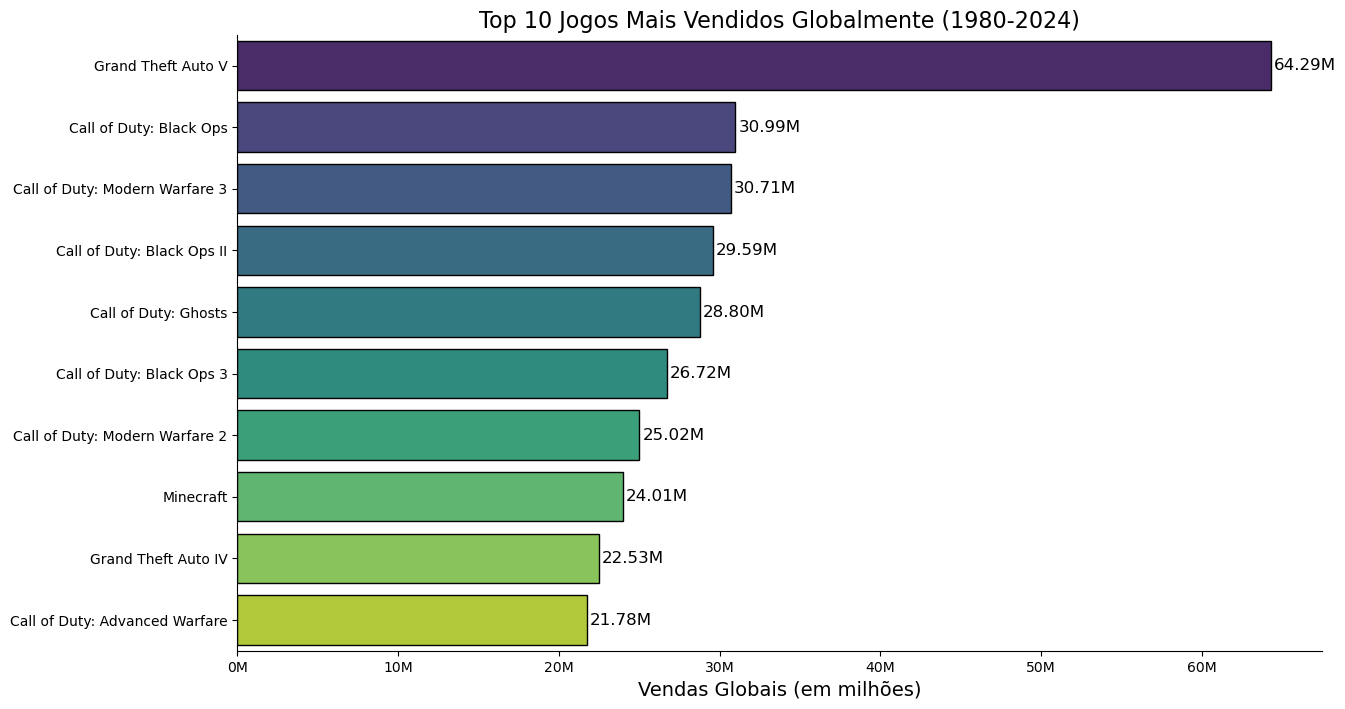

In [32]:
plt.figure(figsize = (14,8))

ax = sns.barplot(
    data = pd.DataFrame(games_mais_vendido),
    x = games_mais_vendido.values,
    y = games_mais_vendido.index,  
    palette = "viridis", 
    edgecolor="black",
    hue = games_mais_vendido.index, 
    legend = False)

def formatador(x, pos):
    return f'{x:.0f}M'

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

for container in ax.containers:
    ax.bar_label(container, fmt = "%.2fM", padding = 2, fontsize = 12)

plt.title("Top 10 Jogos Mais Vendidos Globalmente (1980-2024)", fontsize = 16, pad = 5)

plt.xlabel("Vendas Globais (em milhões)", fontsize = 14)

plt.ylabel("")

sns.despine()

plt.show()

### Observando o Gráfico acima podemos notar uma discrepância bem acentuada entre o primeiro ("Grand Theft Auto V") e o segundo ("Call of Duty: Black Ops") colocados, onde o "Gta V" tem o dobro de valor do "Call of Duty: Black Ops". Uma característica em comum em todos os jogos selecionados é a presença do modo online, possibilitando os jogadores a desfrutarem do jogo além da história. Outro ponto que vale ser destacado, é o fato de jogos como "Gta V" e "Minecraft" contam com diversos mod's disponibilizados pela própria comunidade, o que acarreta em ainda mais conteúdo fora da história padrão dos jogos.

In [6]:
plataformas = ds.groupby(["title", "console"])['total_sales'].sum().sort_values(ascending = False).head(15)

plataformas


title                           console
Grand Theft Auto V              PS3        20.32
                                PS4        19.39
Grand Theft Auto: Vice City     PS2        16.15
Grand Theft Auto V              X360       15.86
Call of Duty: Black Ops 3       PS4        15.09
Call of Duty: Modern Warfare 3  X360       14.82
Call of Duty: Black Ops         X360       14.74
Red Dead Redemption 2           PS4        13.94
Call of Duty: Black Ops II      X360       13.86
                                PS3        13.80
Call of Duty: Modern Warfare 2  X360       13.53
Call of Duty: WWII              PS4        13.40
Call of Duty: Modern Warfare 3  PS3        13.35
Grand Theft Auto III            PS2        13.10
Call of Duty: Black Ops         PS3        12.67
Name: total_sales, dtype: float64

In [7]:
df_pivot = plataformas.unstack(level='console').fillna(0)

df_pivot['Total'] = df_pivot.sum(axis=1)

df_pivot = df_pivot.sort_values('Total', ascending=True).drop('Total', axis=1)

df_pivot


console,PS3,PS4,PS2,X360
title,,,,
Grand Theft Auto III,0.00,0.00,13.10,0.00
Call of Duty: WWII,0.00,13.40,0.00,0.00
Call of Duty: Modern Warfare 2,0.00,0.00,0.00,13.53
Red Dead Redemption 2,0.00,13.94,0.00,0.00
Call of Duty: Black Ops 3,0.00,15.09,0.00,0.00
Grand Theft Auto: Vice City,0.00,0.00,16.15,0.00
Call of Duty: Black Ops,12.67,0.00,0.00,14.74
Call of Duty: Black Ops II,13.80,0.00,0.00,13.86
Call of Duty: Modern Warfare 3,13.35,0.00,0.00,14.82


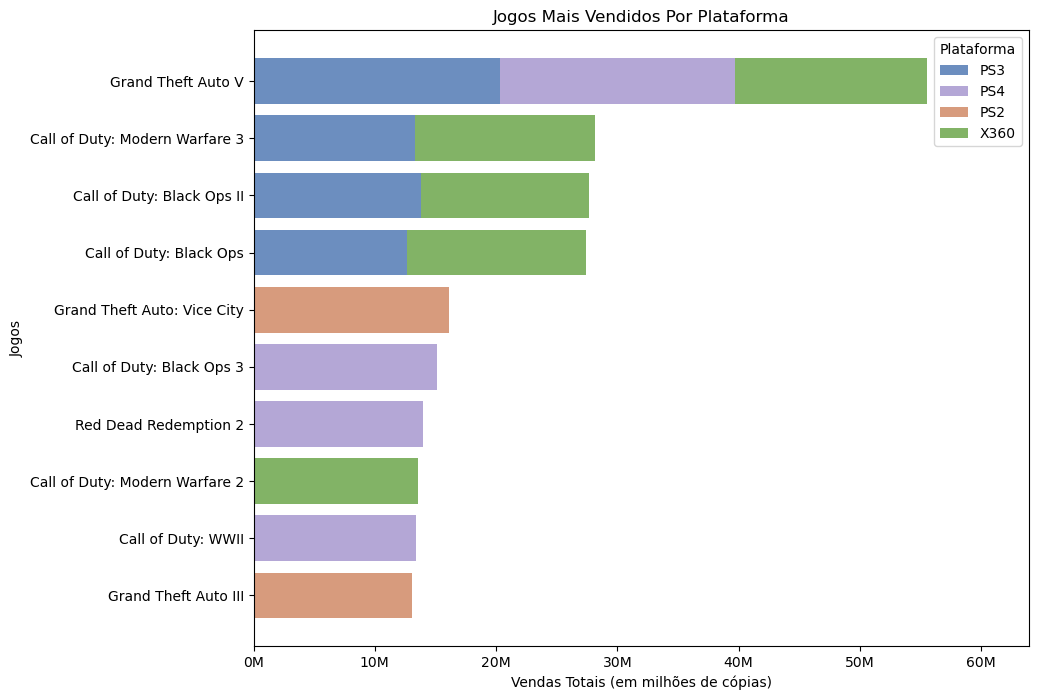

In [8]:
cores_consoles = {
    "PS3" : "#6C8EBF",   
    "PS4" : "#B4A7D6",   
    "PS2" : "#D79B7D",  
    "X360" : "#82B366"
}

plt.figure(figsize=(10, 8))

jogos = df_pivot.index

y_pos = np.arange(len(jogos))

left = np.zeros(len(jogos))

for console in df_pivot.columns:

    vendas = df_pivot[console].values

    plt.barh(
        y_pos,
        vendas,
        left = left,
        color = cores_consoles.get(console, "gray"),
        label = console
    )
    
    left += vendas

plt.yticks(y_pos, jogos)

plt.ylabel("Jogos")

plt.xlabel("Vendas Totais (em milhões de cópias)")

plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(formatador))

plt.xlim(0, df_pivot.sum(axis=1).max() * 1.15) 

handles, labels = plt.gca().get_legend_handles_labels()

labels_unicos = list(dict.fromkeys(labels))  


plt.legend(handles[:len(labels_unicos)], labels_unicos, title = "Plataforma", loc = "best")

plt.title("Jogos Mais Vendidos Por Plataforma")

plt.show()

In [9]:
mine = ds[ds['title'] == 'Minecraft']

mine.head(7)

,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date
54,Minecraft,PS4,Misc,Sony Computer Entertainment,Mojang,9.4,6.33,1.89,0.35,3.13,0.96,2014-10-07
58,Minecraft,PS3,Misc,Sony Computer Entertainment America,Mojang,NaN,6.05,2.21,NaN,2.86,0.99,2014-05-16
69,Minecraft,XOne,Misc,Microsoft Studios,Mojang,NaN,5.43,3.23,NaN,1.71,0.49,2014-11-18
366,Minecraft,PSV,Misc,Sony Computer Entertainment America,4J Studios,NaN,2.47,0.22,1.25,0.73,0.27,2014-11-11
571,Minecraft,NS,Sandbox,Mojang,4J Studios,9.2,1.89,0.69,0.52,0.56,0.12,2018-06-21
849,Minecraft,WiiU,Misc,Mojang,4J Studios,5.5,1.47,0.50,0.38,0.49,0.09,2016-06-17
4477,Minecraft,3DS,Misc,Nintendo,Other Ocean Interactive,6.7,0.37,0.33,NaN,NaN,0.04,2017-11-10
